In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime 
#plt.style.use('dark_background')

%matplotlib inline

## Dataset Description
#### Type: Timeseries, Multivariate

The dataset consist on the reading of 14 temperature modulated mox sensors.
Each experiment consists of 100 measurements: 10 experimental mixtures uniformly distributed in the range of 0 - 20 ppm and 10 replicates per concentration.

At the beggining of each experiment the gas chamber is cleaned by 15 mins using a stream of 240 mln/min. And after that the gas mixtures are released at 240mln/min, thus assuming the flow rate is constant.

A single experiment lasted 25 hours (100 samples x 15 minutes / sample) and was replicated on 13 working days.


## Data Loading

In [67]:
path = "./dataset_tempMod_CO_RH"

# I get a list of the filenames for later use in a for loop.
# Then they get sorted by name and the last file which is the Readme.txt gets sliced.
files = sorted(os.listdir(path))[:-1]
files

['20160930_203718.csv',
 '20161001_231809.csv',
 '20161003_085624.csv',
 '20161004_104124.csv',
 '20161005_140846.csv',
 '20161006_182224.csv',
 '20161007_210049.csv',
 '20161008_234508.csv',
 '20161010_095046.csv',
 '20161011_113032.csv',
 '20161013_143355.csv',
 '20161014_184659.csv',
 '20161016_053656.csv']

In [71]:
# Here I load the csv into a comprehension list, I format the timedelta plus the date of
# the experiment specified in the filename.
df_list = []

for i in files[1:2]:
    ptf = path + "/" + i
    temp = pd.read_csv(ptf)
    # Reading the CSV files in intervals of 5seconds.
    temp['Time (s)'] = pd.to_timedelta(temp['Time (s)'], unit='sec')
    
    date = datetime.strptime(i[:-4],'%Y%m%d_%H%M%S')
    temp['Time (s)'] = [x+date for x in temp['Time (s)']]
    
    temp.set_index('Time (s)', inplace=True)
    resampled = temp.resample('1min', label='right').mean()    
   
    df_list.append(resampled)   
    print(ptf + " " + "loaded")
   

./dataset_tempMod_CO_RH/20161001_231809.csv loaded


In [72]:
len(df_list)

1

In [73]:
df = pd.concat(df_list)
df.head()

,CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),...,0.1093,0.1341,0.1151,0.1188,0.1062,0.1290,0.1183,0.1204,0.1087,0.1130
Time (s),,,,,,,,,,,,,,,,,,,,,
2016-10-01 23:19:00,0.0,49.948768,26.514660,240.143886,0.404427,10.913622,12.611387,16.678977,15.033923,26.064013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01 23:20:00,0.0,50.144234,26.496690,239.964670,0.332726,12.737605,14.711943,19.512253,18.025028,30.683725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01 23:21:00,0.0,49.736666,26.486659,239.986009,0.360747,13.359203,15.252133,20.122753,17.688981,30.802655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01 23:22:00,0.0,49.734159,26.476641,239.962271,0.372958,9.461186,10.983362,14.559823,14.779369,25.263628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01 23:23:00,0.0,49.735629,26.482511,240.009816,0.332894,13.030846,14.690023,19.529900,18.315210,31.722407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df = df.iloc[:,:19]
df.head()

,CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
Time (s),,,,,,,,,,,,,,,,,,,
2016-10-01 23:19:00,0.0,49.948768,26.514660,240.143886,0.404427,10.913622,12.611387,16.678977,15.033923,26.064013,23.046091,26.035270,35.591902,30.573196,38.056174,38.775637,34.958997,31.133402,42.338223
2016-10-01 23:20:00,0.0,50.144234,26.496690,239.964670,0.332726,12.737605,14.711943,19.512253,18.025028,30.683725,27.517715,30.911057,40.107829,36.461750,45.617973,45.078891,40.955121,37.308995,49.992757
2016-10-01 23:21:00,0.0,49.736666,26.486659,239.986009,0.360747,13.359203,15.252133,20.122753,17.688981,30.802655,27.754963,30.542314,43.079661,36.270347,45.752940,46.200472,40.681900,37.262139,50.079354
2016-10-01 23:22:00,0.0,49.734159,26.476641,239.962271,0.372958,9.461186,10.983362,14.559823,14.779369,25.263628,21.730123,24.452332,40.982408,34.535507,43.685520,44.910094,38.805165,35.518496,48.257032
2016-10-01 23:23:00,0.0,49.735629,26.482511,240.009816,0.332894,13.030846,14.690023,19.529900,18.315210,31.722407,28.028069,31.018131,46.763602,39.716454,49.988873,50.426022,43.479671,40.428055,54.691731


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1516 entries, 2016-10-01 23:19:00 to 2016-10-03 00:34:00
Freq: T
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CO (ppm)            1516 non-null   float64
 1   Humidity (%r.h.)    1516 non-null   float64
 2   Temperature (C)     1516 non-null   float64
 3   Flow rate (mL/min)  1516 non-null   float64
 4   Heater voltage (V)  1516 non-null   float64
 5   R1 (MOhm)           1516 non-null   float64
 6   R2 (MOhm)           1516 non-null   float64
 7   R3 (MOhm)           1516 non-null   float64
 8   R4 (MOhm)           1516 non-null   float64
 9   R5 (MOhm)           1516 non-null   float64
 10  R6 (MOhm)           1516 non-null   float64
 11  R7 (MOhm)           1516 non-null   float64
 12  R8 (MOhm)           1516 non-null   float64
 13  R9 (MOhm)           1516 non-null   float64
 14  R10 (MOhm)          1516 non-null   float64
 15  R11 (MOhm) 

From the previous information print we can see that there are no NaN values present in the columns.

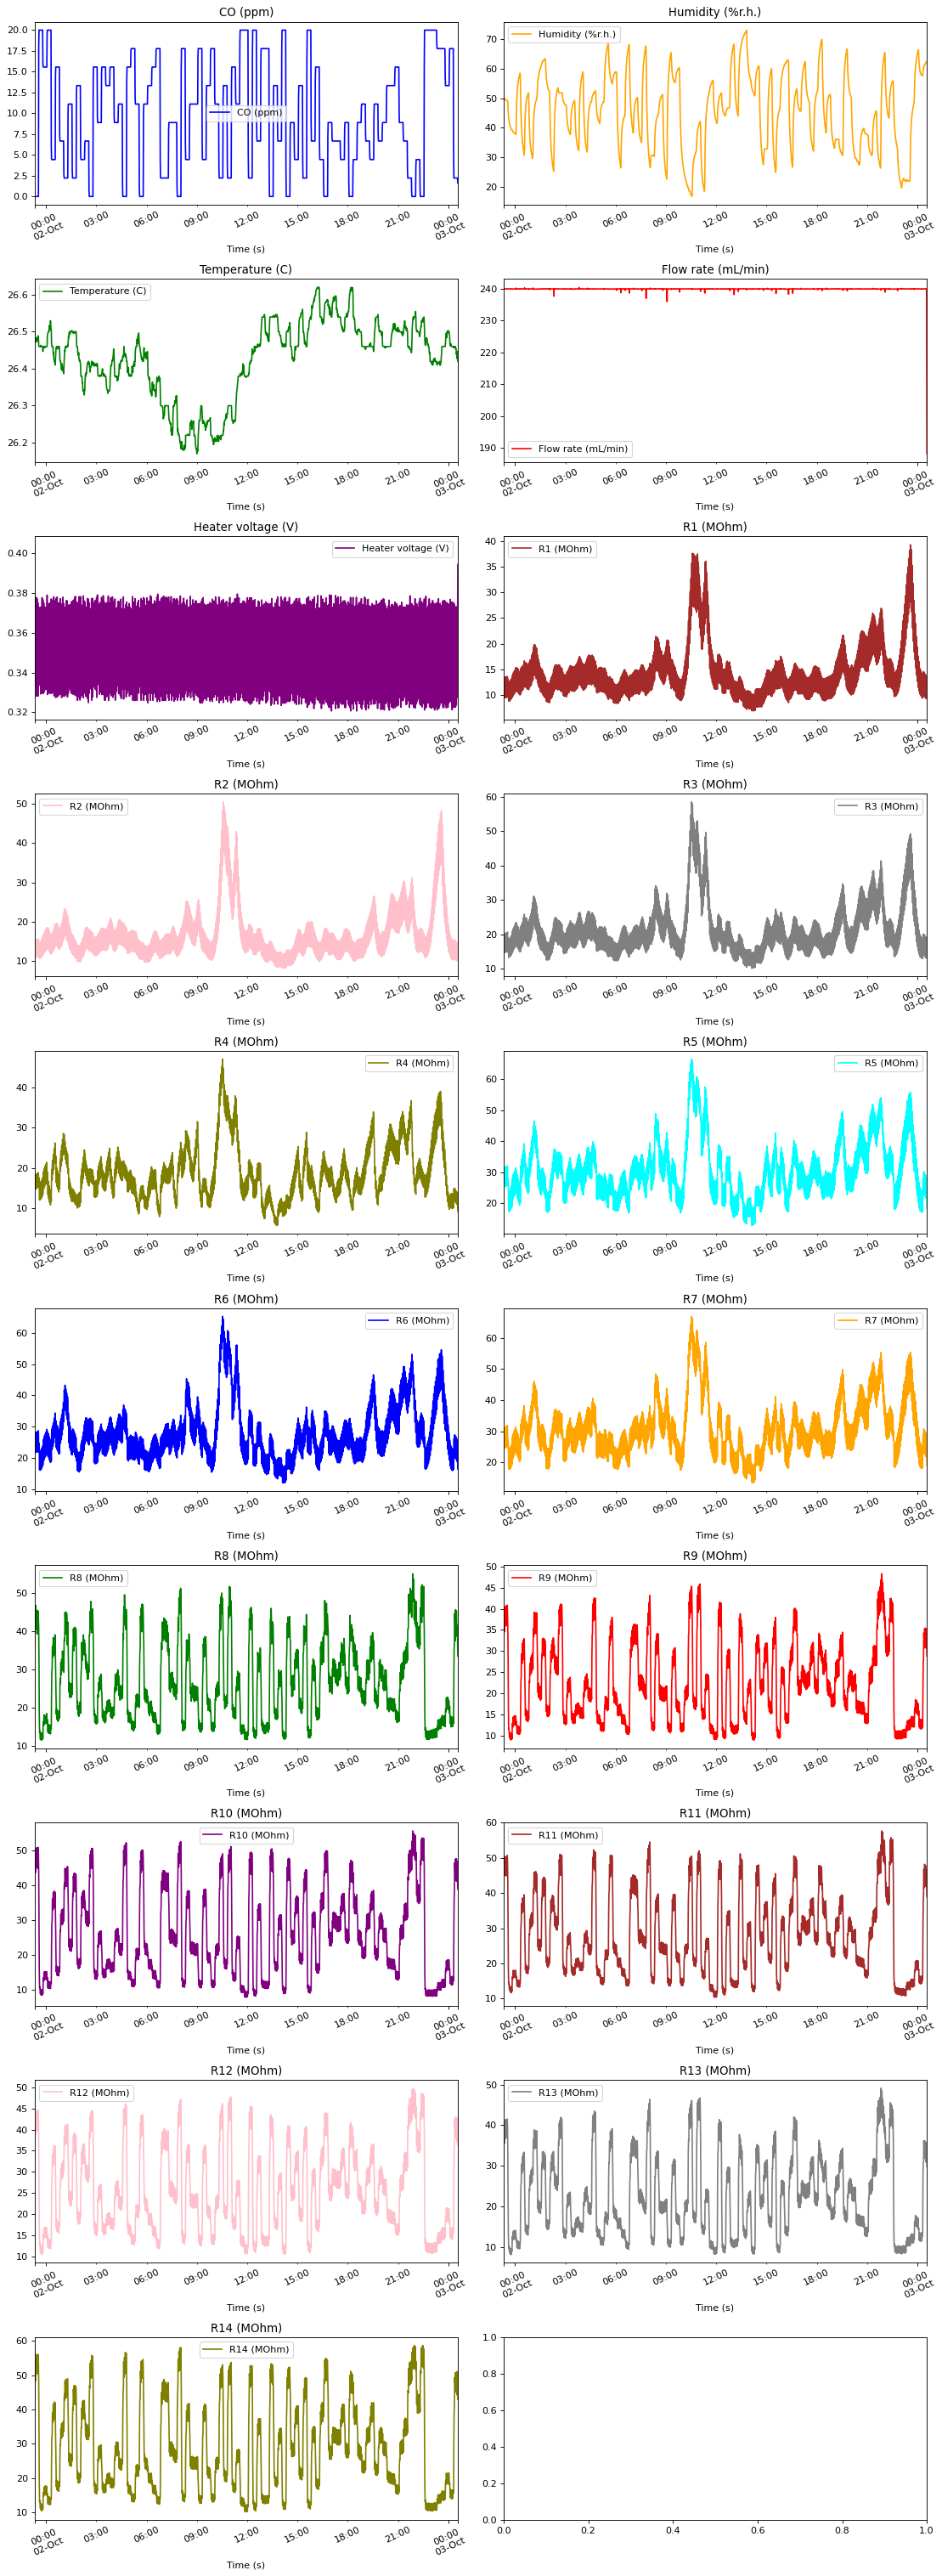

In [76]:
colors = ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan']
def Visualize(data):
    features = list(df.select_dtypes(include=[np.number]).columns.values)
    feature_size = len(features)
    fig, axes = plt.subplots( nrows=int(np.ceil(feature_size/2)), ncols = 2,
                             figsize=(14,feature_size*2), dpi=80, facecolor='w', edgecolor='k')
    for i in range(feature_size):
        key = features[i]
        c=colors[i%(len(colors))]
        t_data = df[key]
        t_data.head()
        ax = t_data.plot(
            ax=axes[i//2, i%2],
            color=c,
            title="{}".format(key),
            rot=25,
            )
        ax.legend([key])
    plt.tight_layout()
    
Visualize(df)

In [77]:
df.columns

Index(['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)',
       'Heater voltage (V)', 'R1 (MOhm)', 'R2 (MOhm)', 'R3 (MOhm)',
       'R4 (MOhm)', 'R5 (MOhm)', 'R6 (MOhm)', 'R7 (MOhm)', 'R8 (MOhm)',
       'R9 (MOhm)', 'R10 (MOhm)', 'R11 (MOhm)', 'R12 (MOhm)', 'R13 (MOhm)',
       'R14 (MOhm)'],
      dtype='object')

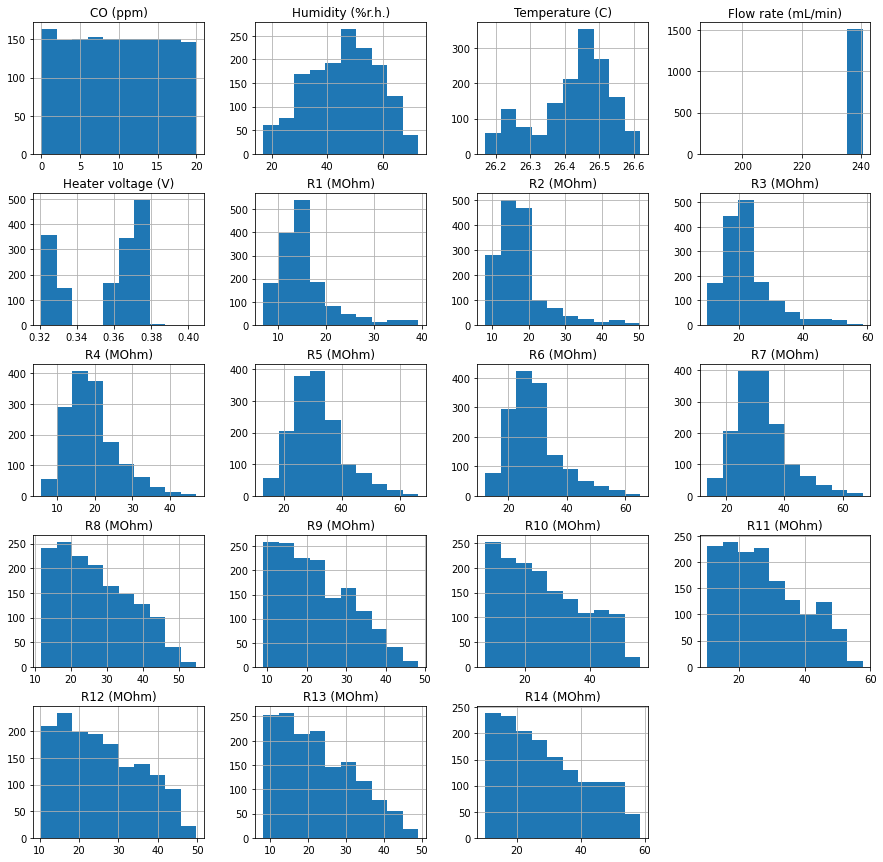

In [78]:
rd_feat = ['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)']
size = (15,15)

df.hist(figsize=size);#;

From the previous histograms the 'CO (ppm)' variable is uniformly distributed. And we can see that only the variable 'Humidity' is gaussian-like distributed. The flow-rate and temperature are rather constant so we can discard them from the modelling part.

array([<AxesSubplot:xlabel='Time (s)'>, <AxesSubplot:xlabel='Time (s)'>,
       <AxesSubplot:xlabel='Time (s)'>, <AxesSubplot:xlabel='Time (s)'>,
       <AxesSubplot:xlabel='Time (s)'>, <AxesSubplot:xlabel='Time (s)'>,
       <AxesSubplot:xlabel='Time (s)'>, <AxesSubplot:xlabel='Time (s)'>],
      dtype=object)

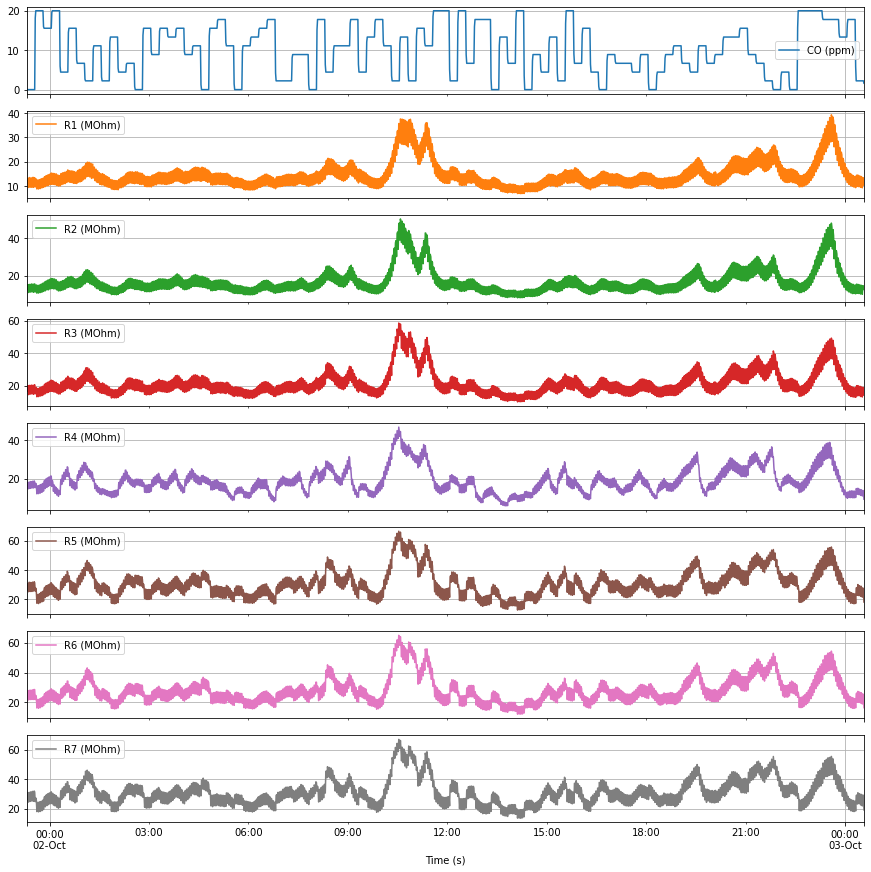

In [79]:
df[['CO (ppm)','R1 (MOhm)','R2 (MOhm)','R3 (MOhm)',
    'R4 (MOhm)','R5 (MOhm)','R6 (MOhm)','R7 (MOhm)']].plot(subplots=True, figsize=size, grid=True)

From the R1 to R7 sensors, it looks like a slightly lagged correlation between sensors versus ppm's.

array([<AxesSubplot:xlabel='Time (s)'>, <AxesSubplot:xlabel='Time (s)'>,
       <AxesSubplot:xlabel='Time (s)'>, <AxesSubplot:xlabel='Time (s)'>,
       <AxesSubplot:xlabel='Time (s)'>, <AxesSubplot:xlabel='Time (s)'>,
       <AxesSubplot:xlabel='Time (s)'>, <AxesSubplot:xlabel='Time (s)'>],
      dtype=object)

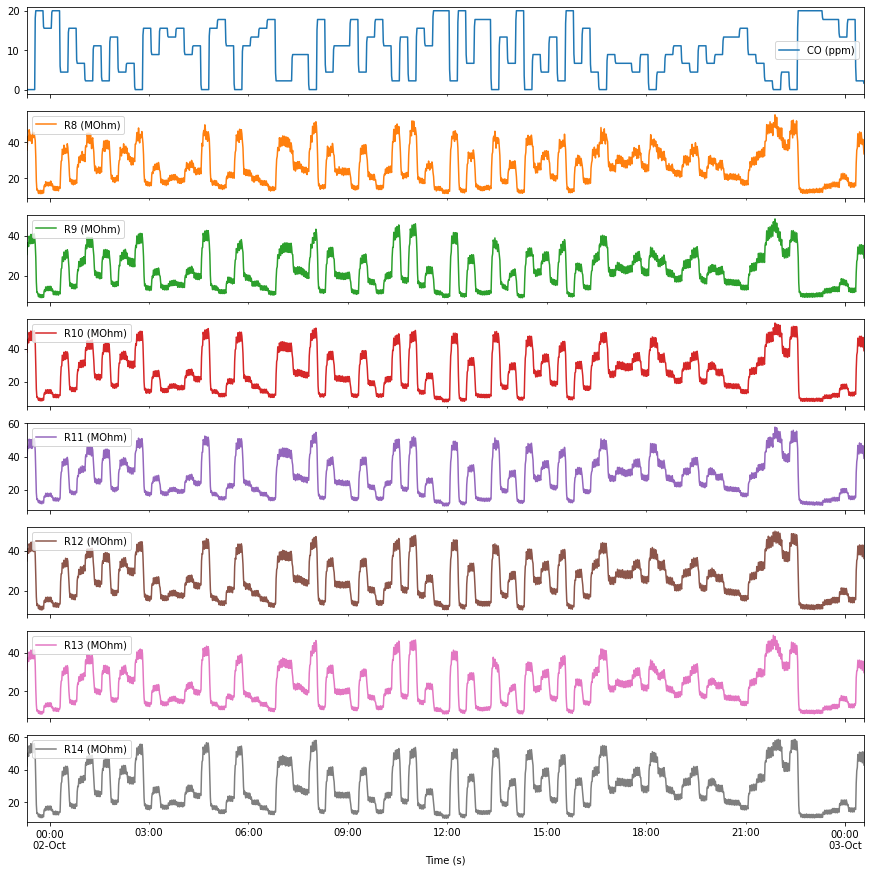

In [80]:
df[['CO (ppm)','R8 (MOhm)','R9 (MOhm)','R10 (MOhm)',
    'R11 (MOhm)','R12 (MOhm)','R13 (MOhm)','R14 (MOhm)']].plot(subplots=True, figsize=size)

From the last figure, we can see a strong negative correlation between the R8-R14 MOX signals and the presence of CO ppm's.

### Lag Plots
-Checking auto-correlation.


-Correlation at different lag levels.


Text(0.5, 1.0, 'CO (ppm)')

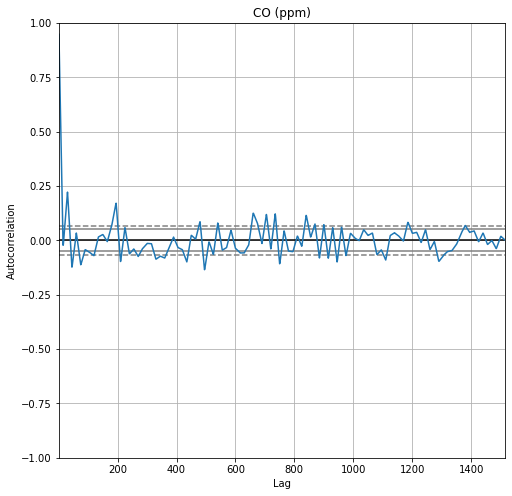

In [81]:
# Autocorrelation of the target variable accross the lag
fig = plt.figure(figsize=(8,8))
pd.plotting.autocorrelation_plot(df['CO (ppm)'])
plt.title('CO (ppm)')

Fluctuation of the autocorrelation of 'CO (ppm)' over lag stay between the meaningfullness intervals, thus we can assume that the target has no seasonality and it is rather stationary.

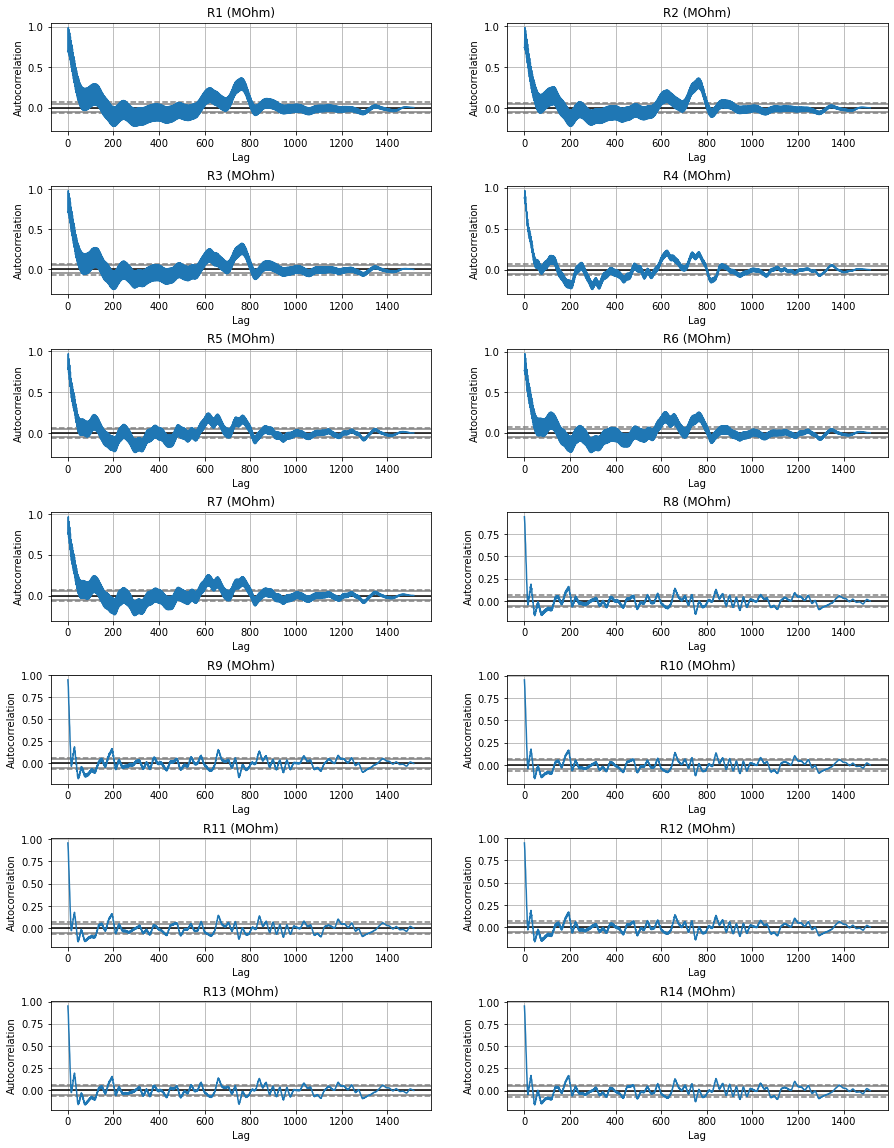

In [82]:
features = ['R1 (MOhm)','R2 (MOhm)','R3 (MOhm)','R4 (MOhm)',
            'R5 (MOhm)','R6 (MOhm)','R7 (MOhm)','R8 (MOhm)',
           'R9 (MOhm)','R10 (MOhm)','R11 (MOhm)','R12 (MOhm)',
           'R13 (MOhm)','R14 (MOhm)',]

fig, axs = plt.subplots(7,2, figsize=(15,20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=0.5)

axs = axs.ravel()

for i in range(len(features)):
    pd.plotting.autocorrelation_plot(df[features[i]], ax=axs[i])
    axs[i].title.set_text(features[i])

From the previous lagplots, the sensors seems to be stationary, this will be later be tested by the Dickey-Fuller test.

### Correlation between variables

In [84]:
corr=df.corr()
corr

,CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
CO (ppm),1.000000,-0.104915,-0.106362,0.032849,-0.003665,0.051825,0.080294,-0.010648,-0.082326,-0.232278,-0.173905,-0.218261,-0.890821,-0.869919,-0.908131,-0.911497,-0.912011,-0.907421,-0.908881
Humidity (%r.h.),-0.104915,1.000000,0.418479,-0.035714,-0.001455,-0.373528,-0.439693,-0.441749,-0.770686,-0.495862,-0.434047,-0.450725,0.038666,0.001675,0.093589,0.086959,0.057365,0.000874,0.079896
Temperature (C),-0.106362,0.418479,1.000000,0.005315,-0.004383,-0.231104,-0.254726,-0.261120,-0.352956,-0.250001,-0.236410,-0.239440,0.061984,0.036310,0.094835,0.087267,0.072328,0.041016,0.090587
Flow rate (mL/min),0.032849,-0.035714,0.005315,1.000000,-0.061031,0.031301,0.026443,0.035609,0.044141,0.045560,0.044148,0.045002,-0.011880,-0.013196,-0.022575,-0.020849,-0.022352,-0.014527,-0.023418
Heater voltage (V),-0.003665,-0.001455,-0.004383,-0.061031,1.000000,-0.287514,-0.256300,-0.275700,-0.219383,-0.284107,-0.282324,-0.293254,-0.133375,-0.130517,-0.106464,-0.108421,-0.125353,-0.110559,-0.104829
R1 (MOhm),0.051825,-0.373528,-0.231104,0.031301,-0.287514,1.000000,0.986475,0.979683,0.815240,0.895618,0.933943,0.910575,0.103932,0.140670,0.035850,0.037702,0.091734,0.122363,0.036583
R2 (MOhm),0.080294,-0.439693,-0.254726,0.026443,-0.256300,0.986475,1.000000,0.984869,0.849112,0.895724,0.932554,0.907760,0.060495,0.099815,-0.004713,-0.002301,0.048088,0.081683,-0.003106
R3 (MOhm),-0.010648,-0.441749,-0.261120,0.035609,-0.275700,0.979683,0.984869,1.000000,0.878773,0.946414,0.974185,0.957362,0.164411,0.208038,0.095930,0.099217,0.150782,0.188847,0.095671
R4 (MOhm),-0.082326,-0.770686,-0.352956,0.044141,-0.219383,0.815240,0.849112,0.878773,1.000000,0.925059,0.897771,0.905705,0.217583,0.263446,0.144109,0.149929,0.199889,0.252363,0.149833
R5 (MOhm),-0.232278,-0.495862,-0.250001,0.045560,-0.284107,0.895618,0.895724,0.946414,0.925059,1.000000,0.990396,0.996638,0.388524,0.430603,0.318589,0.323434,0.373395,0.414054,0.318635


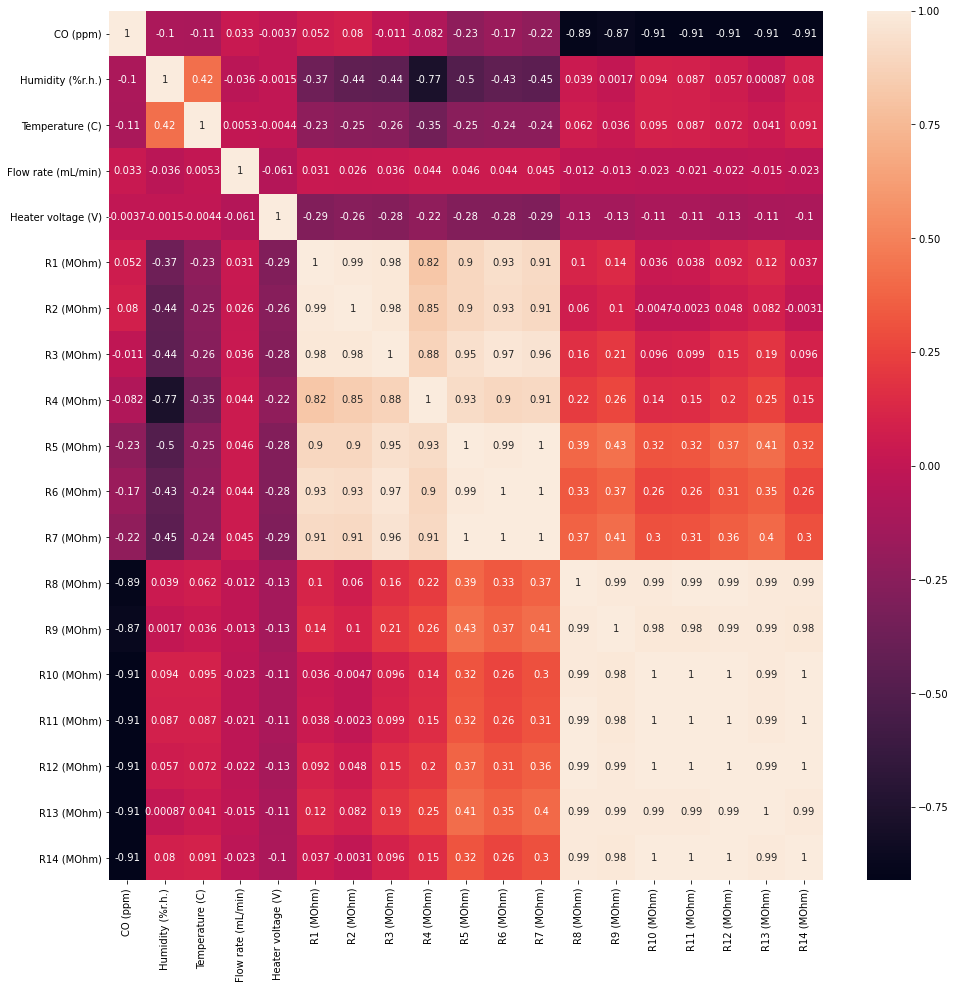

In [88]:
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot = True)
heat_map=plt.gcf()
heat_map.set_size_inches(16,16)

From the previous table we can see the correlation between variables, the p-values above 0.5 are considered relevant for the prediction. From the sensors R8 to R14 we can see a strong negative correlation and thus they can be used as predictors.

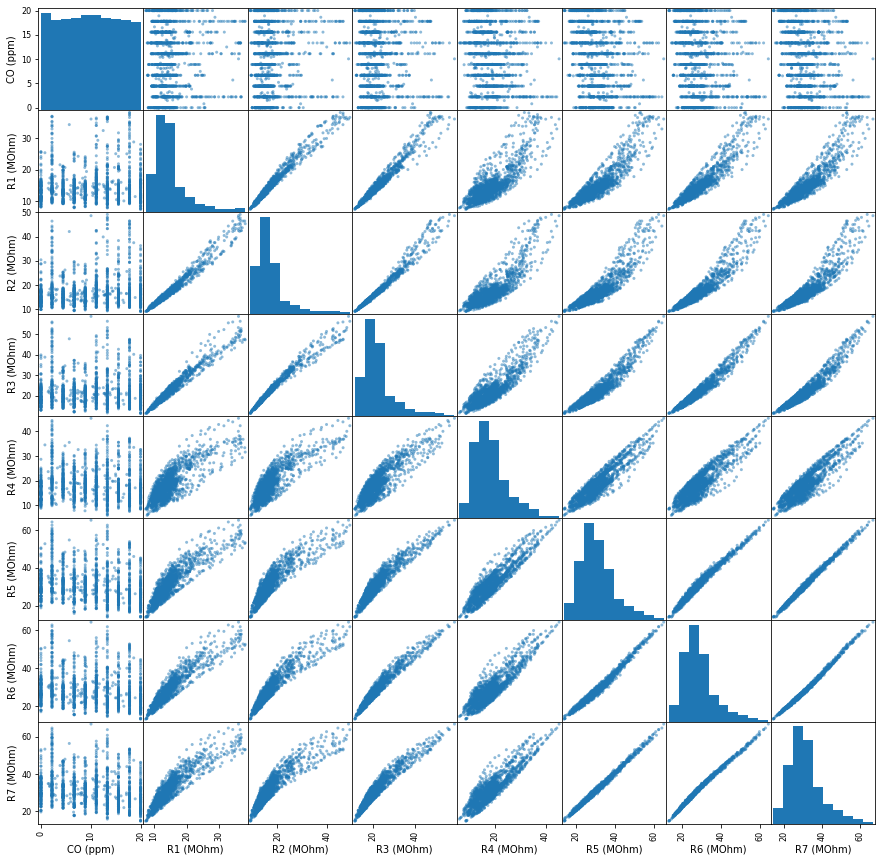

In [56]:
corr_feats = ['CO (ppm)', 'R1 (MOhm)','R2 (MOhm)','R3 (MOhm)','R4 (MOhm)',
            'R5 (MOhm)','R6 (MOhm)','R7 (MOhm)']
pd.plotting.scatter_matrix(df[corr_feats],figsize=(15,15));#;

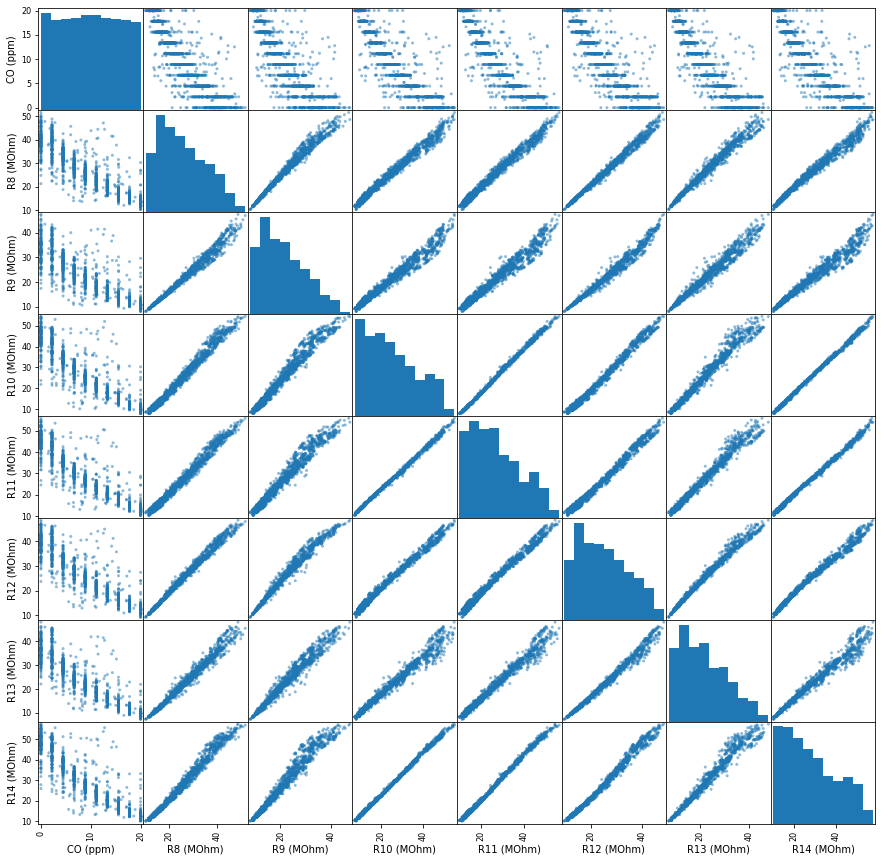

In [52]:
corr_feats = ['CO (ppm)','R8 (MOhm)',
           'R9 (MOhm)','R10 (MOhm)','R11 (MOhm)','R12 (MOhm)',
           'R13 (MOhm)','R14 (MOhm)',]
pd.plotting.scatter_matrix(df[corr_feats],figsize=(15,15));#;

On the first scatter matrix it seems that there's no linear relationship between variables. But in the second scatter matrix it seems to EXIST a negative linear relationship between CO and the R8-R14 sensors.

There's also presence of noise and outliers.

In [58]:
    len(df)

1516

### Test Hypothesis.

#### Augmented Dickey-Fuller unit root test.

       Null Hypothesis
       
       Series possesses a unit root and hence is not stationary.


       Alternate Hypothesis
       
       Series are stationary.

In [59]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [62]:
for i in range(len(df.columns)):
    result = adfuller(df[df.columns[i]])
    if result[1] > 0.05:
        print('{} - Series is not Stationary'.format(df.columns[i]))
    else:
        print('{} - Series is Stationary'.format(df.columns[i]))


CO (ppm) - Series is Stationary
Humidity (%r.h.) - Series is Stationary
Temperature (C) - Series is not Stationary
Flow rate (mL/min) - Series is Stationary
Heater voltage (V) - Series is Stationary
R1 (MOhm) - Series is Stationary
R2 (MOhm) - Series is Stationary
R3 (MOhm) - Series is Stationary
R4 (MOhm) - Series is Stationary
R5 (MOhm) - Series is Stationary
R6 (MOhm) - Series is Stationary
R7 (MOhm) - Series is Stationary
R8 (MOhm) - Series is Stationary
R9 (MOhm) - Series is Stationary
R10 (MOhm) - Series is Stationary
R11 (MOhm) - Series is Stationary
R12 (MOhm) - Series is Stationary
R13 (MOhm) - Series is Stationary
R14 (MOhm) - Series is Stationary


#### Granger Casuality Test
Null Hypothesis: Xt dow not granger cause Yt


Alternative Hyphotesis: Xt does granger causes Yt


In [89]:
max_lags=10
y='CO (ppm)'

In [90]:
for i in range(len(df.columns)-1):
    results = grangercausalitytests(df[[y,df.columns[i+1]]], max_lags, verbose=False)
    p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
    print('Column - {} : P_Values - {}'.format(df.columns[i+1],p_values))

Column - Humidity (%r.h.) : P_Values - [0.0964, 0.2558, 0.3583, 0.517, 0.6373, 0.7079, 0.7937, 0.8493, 0.8678, 0.9104]
Column - Temperature (C) : P_Values - [0.2873, 0.4645, 0.4328, 0.5687, 0.6861, 0.4279, 0.284, 0.3495, 0.3179, 0.3474]
Column - Flow rate (mL/min) : P_Values - [0.789, 0.9985, 0.9952, 0.9994, 0.9998, 1.0, 1.0, 1.0, 1.0, 1.0]
Column - Heater voltage (V) : P_Values - [0.9242, 0.991, 0.9992, 0.3902, 0.5214, 0.6625, 0.7379, 0.6786, 0.6127, 0.6015]
Column - R1 (MOhm) : P_Values - [0.3153, 0.5462, 0.7513, 0.8656, 0.9123, 0.62, 0.3706, 0.5074, 0.5118, 0.7237]
Column - R2 (MOhm) : P_Values - [0.3317, 0.5394, 0.7441, 0.827, 0.8885, 0.9084, 0.9309, 0.96, 0.2923, 0.375]
Column - R3 (MOhm) : P_Values - [0.264, 0.5675, 0.7724, 0.8822, 0.6146, 0.7447, 0.8482, 0.9321, 0.2245, 0.434]
Column - R4 (MOhm) : P_Values - [0.105, 0.3367, 0.4272, 0.6389, 0.6437, 0.5265, 0.7811, 0.7507, 0.5507, 0.8346]
Column - R5 (MOhm) : P_Values - [0.1369, 0.4905, 0.4279, 0.6542, 0.334, 0.3945, 0.1736, 0.352

From the previous log, we reject the null hyphotesis in R8-R14 sensors since p-value is below significance level (0.05) in all lag instances.

### Features Selection


In [94]:
# I selected the features where the null hyphotesis was rejected.

features = ['CO (ppm)','R8 (MOhm)','R9 (MOhm)','R10 (MOhm)','R11 (MOhm)','R12 (MOhm)','R13 (MOhm)','R14 (MOhm)',]
df_in = df[features]
df_in.head()

,CO (ppm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
Time (s),,,,,,,,
2016-10-01 23:19:00,0.0,35.591902,30.573196,38.056174,38.775637,34.958997,31.133402,42.338223
2016-10-01 23:20:00,0.0,40.107829,36.461750,45.617973,45.078891,40.955121,37.308995,49.992757
2016-10-01 23:21:00,0.0,43.079661,36.270347,45.752940,46.200472,40.681900,37.262139,50.079354
2016-10-01 23:22:00,0.0,40.982408,34.535507,43.685520,44.910094,38.805165,35.518496,48.257032
2016-10-01 23:23:00,0.0,46.763602,39.716454,49.988873,50.426022,43.479671,40.428055,54.691731


### Dataframe for training and testing

In [95]:
df_train = df_in[:int(0.9*(len(df_in)))]
df_test = df_in[int(0.9*(len(df_in))):]

In [96]:
df_train.shape

(1364, 8)

In [97]:
df_test.shape

(152, 8)

### Model Training

In [103]:
model = VAR(df_train, freq='Min')

In [104]:
model.select_order(20).summary()

,AIC,BIC,FPE,HQIC
0,2.577,2.608,13.16,2.589
1,-9.301,-9.023,9.129e-05,-9.197
2,-12.35,-11.83,4.312e-06,-12.16
3,-13.78,-13.01,1.035e-06,-13.49
4,-16.28,-15.26,8.520e-08,-15.90
5,-16.70,-15.43*,5.615e-08,-16.22
6,-16.77,-15.25,5.230e-08,-16.20
7,-16.94,-15.18,4.382e-08,-16.28*
8,-17.01,-14.99,4.122e-08,-16.25
9,-17.01,-14.75,4.097e-08,-16.16


From the previous summary, I selected the lag instance with the minimal coefficient metric.

The lag 5 was selected.


In [107]:
model = VAR(df_train, freq='1min')
results = model.fit(5)

In [108]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 08, Aug, 2021
Time:                     01:42:23
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -15.2472
Nobs:                     1359.00    HQIC:                  -16.0346
Log likelihood:          -3883.04    FPE:                6.78740e-08
AIC:                     -16.5058    Det(Omega_mle):     5.35100e-08
--------------------------------------------------------------------
Results for equation CO (ppm)
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -3.205446         1.750248           -1.831           0.067
L1.CO (ppm)           1.143136         0.047704           23.963           0.000
L1.R8 (MOhm)          0.011735         0.123371          

### Model Validation

In [112]:
lags = results.k_ar
pd.DataFrame(data=results.forecast(df_train.values[-lags:],steps=5))

,0,1,2,3,4,5,6,7
0,1.890997,44.888388,38.173938,50.262319,50.674878,44.942134,38.828644,54.127883
1,4.923287,40.933998,34.470196,45.105205,46.147988,40.203008,34.058095,48.864320
2,6.181827,43.132814,36.134522,46.648963,47.419475,41.960475,35.218190,50.363097
3,7.886134,37.039241,30.442884,39.542869,40.609866,36.089374,29.905981,43.127046
4,10.007931,31.687818,25.794469,33.279576,35.156739,30.864064,24.975968,36.822868


In [111]:
df_test[0:5]

,CO (ppm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
Time (s),,,,,,,,
2016-10-02 22:03:00,0.000000,44.305363,37.685442,50.064638,51.518380,45.499451,39.167069,53.963359
2016-10-02 22:04:00,3.505607,41.139156,35.183124,47.257151,48.204880,42.594690,36.777664,51.396448
2016-10-02 22:05:00,4.440000,47.721704,38.050785,49.454628,50.324258,45.397877,39.434488,53.905444
2016-10-02 22:06:00,4.440000,40.762057,33.234767,42.195286,42.756773,39.922378,34.917770,46.426295
2016-10-02 22:07:00,4.440000,37.058338,29.663672,37.249358,39.015302,36.284848,31.842398,41.473427
